<a href="https://colab.research.google.com/github/riyamendon99/CSE575-SML-Riya-Mendon/blob/main/HW2_2_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Name: Riya Mendon ASU ID: 1229584722***

In this homework, there are three different datasets consisting of 2-dimensional input features and binary class labels, and you will be asked to implement machine learning classifiers. Total 3 pts.

Let's begin by importing some libaries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys; sys.path.append('/content/drive/MyDrive/my_utils.py')

In [ ]:
%pwd

'/content'

In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
from my_utils import *

import torch
import torch.nn as nn
import torch.utils.data as data
# dummy trainloader
trainloader = data.DataLoader(data.TensorDataset(torch.Tensor(1), torch.Tensor(1)), batch_size=1, shuffle=True)
device = torch.device('cpu')

import matplotlib.pyplot as plt

Next, we set a random seed for reproducibility.

In [ ]:
import numpy as np
import random

seed = 0
np.random.seed(seed)
torch.random.manual_seed(seed)
random.seed(seed)

# Two Gaussian blobs

This is the first dataset, Gaussian distributed.  

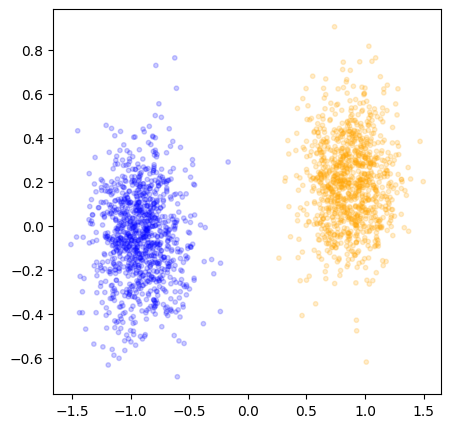

In [ ]:
X, y = sample_gaussian()
fig, ax = plt.subplots(1,1, figsize=(5,5))
plot_scatter(ax, X, y)

Your task is to build a binary classifier based on logistic regression.

[1 pt] Fill in the following class template to perform logistic regression.

***Answer to Question 2 below:***

In [ ]:
class Model(nn.Module):
    def __init__(self,device="cpu"):
        super(Model, self).__init__()
        #Defining a Linear layer and passing 2 features
        self.linear = torch.nn.Linear(2,1)

    def forward(self, x):
      #Finding the prediction
      y_prediction = self.linear(x)
      #Passing the prediction to sigmoid function for getting the predictions between 0 and 1
      y = torch.sigmoid(y_prediction)
      return y

In [ ]:
model = Model().to(device)

We will be using AdamW optimizer.

In [ ]:
import torch.optim as optim
optimizer = optim.AdamW(model.parameters(), lr=1e-2, weight_decay=1e-6)
#Utilizing the Binary Cross Entropy to calculate the loss
loss_function = torch.nn.BCELoss()

With the defined model (logistic_reg) and the optimizer, we will train the model using binary cross entropy.

[1 pt] Finish implementing the training loop.

In [ ]:
for itr in range(1, 200001):
    optimizer.zero_grad()
    yh = torch.squeeze(model(X)) # forward pass
    loss = loss_function(yh.float(),y.float()) # compute loss
    loss.backward() # backward pass
    if itr%50000 == 0:
      print("Number of Iteration ", itr, " Loss is ", loss)
    optimizer.step()

Number of Iteration  50000  Loss is  tensor(1.0289e-09, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  100000  Loss is  tensor(2.2960e-10, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  150000  Loss is  tensor(1.1665e-10, grad_fn=<BinaryCrossEntropyBackward0>)
Number of Iteration  200000  Loss is  tensor(1.1225e-10, grad_fn=<BinaryCrossEntropyBackward0>)


In [ ]:
#Accessing the model parameters
for name, parameter in model.named_parameters():
  print(name, parameter)

linear.weight Parameter containing:
tensor([[69.2934, -6.5525]], requires_grad=True)
linear.bias Parameter containing:
tensor([-3.2043], requires_grad=True)


With the trained model, make predictions on training set.

[1 pt] Draw a plot depicting the data points that are color coded based on the predicted labels, and the decision boundary leared by the logistic regression. See the example below.

In [ ]:
print(yh)

tensor([1.4536e-35, 1.0508e-30, 9.9322e-25,  ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00], grad_fn=<SqueezeBackward0>)


Predictions  [0 0 0 ... 1 1 1]


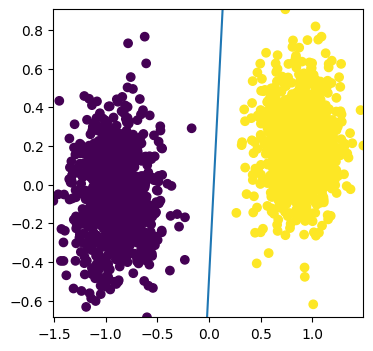

In [ ]:
#Defining a dictionary to store the weights and bias values
p = {}
def decision_boundary():
  for name, parameter in model.named_parameters():
    p[name] = parameter
  #Getting the weights and bias values to plot the decision boundary
  bias = p['linear.bias'][0]
  weight = p['linear.weight'][0]
  x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
  plt.plot(x_line, -(bias + weight[0]*x_line)/weight[1])
  #Setting the X axis and Y axis limits
  plt.xlim(X[:, 0].min(), X[:, 0].max())
  plt.ylim(X[:, 1].min(), X[:, 1].max())


with torch.no_grad():
    fig = plt.figure(figsize=(4,4))
    #Predictions greater than 0.5 are set to 1 and lower than 0.5 are set to 0
    yh = (model(X)>0.5).int().squeeze().numpy()
    print("Predictions ", yh)
    #Plotting the predictions
    plt.scatter(X[:, 0], X[:, 1], c = yh)
    decision_boundary()

***Answer to Question 3 in the next page:***